In [1]:
import zoopt

In [2]:
from sparse_mse import SparseMSE
from zoopt import Objective, Parameter, ExpOpt
from math import exp

[zoopt] expected remaining running time: 00:00:12
[zoopt] solved solution is:
[zoopt] x: array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0.])
[zoopt] value: [0.5632809741874065, 0.0]


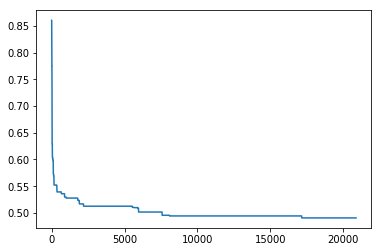

[zoopt] Best 1 result: [0.56328097 0.        ] +- [0. 0.]


In [4]:
# load data file
mse = SparseMSE('sonar.arff')
mse.set_sparsity(8)

# setup objective
# print(mse.get_dim().get_size())
objective = Objective(func=mse.loss, dim=mse.get_dim(), constraint=mse.constraint)
parameter = Parameter(algorithm='poss', budget=2 * exp(1) * (mse.get_sparsity() ** 2) * mse.get_dim().get_size())

# perform sparse regression with constraint |w|_0 <= k
solution_list = ExpOpt.min(objective, parameter, repeat=1, plot=True)